<a href="https://colab.research.google.com/github/ATPYINACAP/AT/blob/main/AT4_U1_M2_CBPR01_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/01_CBPR01/UNIDAD 02/AT02.2/Perfil Lipídico.xlsx')

# **Actividad 01**

Determinar la media y desviación estándar muestral de las variables.


In [28]:
df.columns

Index(['Paciente', 'Colesterol Total', 'Colesterol HDL', 'Colesterol VLDL',
       'Colesterol LDL'],
      dtype='object')

In [29]:
# Se determina media y D. Est para el 'Colesterol Total'
m1=round(df['Colesterol Total'].mean(),4)
de1=round(df['Colesterol Total'].std(),4)
print('Colesterol Total')
print('Media:',m1)
print('Desviación Estandar:',de1)

Colesterol Total
Media: 182.731
Desviación Estandar: 27.37


In [30]:
# Se determina media y D. Est para el 'Colesterol HDL'
m2=round(df['Colesterol HDL'].mean(),4)
de2=round(df['Colesterol HDL'].std(),4)
print('Colesterol HDL')
print('Media:',m2)
print('Desviación Estandar:',de2)

Colesterol HDL
Media: 98.946
Desviación Estandar: 23.468


In [31]:
# Se determina media y D. Est para el 'Colesterol VLDL'
m3=round(df['Colesterol VLDL'].mean(),4)
de3=round(df['Colesterol VLDL'].std(),4)
print('Colesterol VLDL')
print('Media:',m3)
print('Desviación Estandar:',de3)

Colesterol VLDL
Media: 52.2856
Desviación Estandar: 51.9307


In [32]:
# Se determina media y D. Est para el 'Colesterol VLDL'
m4=round(df['Colesterol LDL'].mean(),4)
de4=round(df['Colesterol LDL'].std(),4)
print('Colesterol LDL')
print('Media:',m4)
print('Desviación Estandar:',de4)

Colesterol LDL
Media: 84.1
Desviación Estandar: 11.0242


#**Actividad 02**
Escogiendo un paciente al azar y considerando ambas variables,
¿Cuál es la probabilidad de que el paciente pertenezca al intervalo de referencia saludable? Grafique su respuesta.


In [33]:
# Libreria para cálculos numericos
import numpy as np

# Libreria para graficas
import matplotlib.pyplot as plt

In [34]:
#a)  Para este caso debemos considerar "Colesterol Total"
# P(50≤X≤200)

import scipy.stats as stats
# Cálculo de CDF (P(x≤ 50))
x1=50
p1 = stats.norm.cdf(x1, loc=m1, scale=de1)

# Cálculo de CDF (P(x≤ 200))
x2=200
p2 = stats.norm.cdf(x2, loc=m1, scale=de1)

#P(50≤X≤200) = F(200) - F(50)
prob=p2-p1

print(f"P({x1} ≤ X ≤ {x2}): {round(prob,4)}")

P(50 ≤ X ≤ 200): 0.736


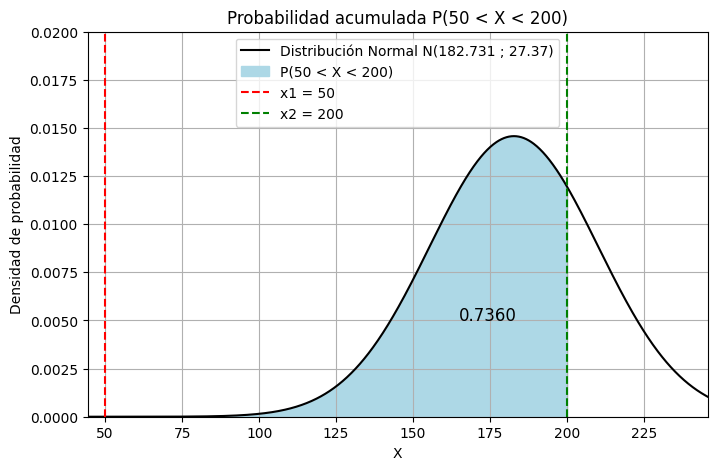

In [35]:
# Calcular la probabilidad acumulada P(x1 < X < x2)

# Crear valores x para la gráfica
x_vals = np.linspace(0.40*df['Colesterol Total'].min(), df['Colesterol Total'].max(),  1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=m1, scale=de1)

# Calcular el área bajo la curva entre a y b
x_fill = np.linspace(x1, x2, 1000)
pdf_fill = stats.norm.pdf(x_fill, loc=m1, scale=de1)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label=f'Distribución Normal N({m1} ; {de1})', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P({x1} < X < {x2})')
plt.axvline(x1, color='red', linestyle='--', label=f'x1 = {x1}')
plt.axvline(x2, color='green', linestyle='--', label=f'x2 = {x2}')

# Ajustar el eje x
plt.xlim(0.40*df['Colesterol Total'].min(), df['Colesterol Total'].max())

# Ajustar el eje y
plt.ylim(0, 0.02)

# Mostrar el valor de la probabilidad dentro del área
plt.text(165, 0.005, f'{prob:.4f}', fontsize=12, color='black')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P({x1} < X < {x2})')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [36]:
#a)  Para este caso debemos considerar "Colesterol HDL"
#  P(40≤Y≤100)

# Cálculo de CDF (P(y≤ 40))
y1=40
p3 = stats.norm.cdf(y1, loc=m2, scale=de2)

# Cálculo de CDF (P(x≤ 100))
y2=100
p4 = stats.norm.cdf(y2, loc=m2, scale=de2)

#P(40≤y≤100) = F(100) - F(40)
prob2=p4-p3

print(f"P({y1} ≤ Y ≤ {y2}): {round(prob2,4)}")

P(40 ≤ Y ≤ 100): 0.5119


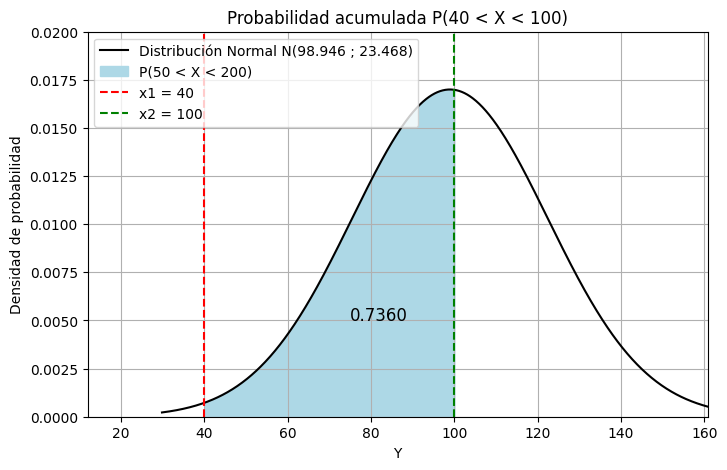

In [41]:
# Calcular la probabilidad acumulada P(x1 < X < x2)

# Crear valores x para la gráfica
x_vals = np.linspace(df['Colesterol HDL'].min(), df['Colesterol HDL'].max(),  1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=m2, scale=de2)

# Calcular el área bajo la curva entre a y b
x_fill = np.linspace(y1, y2, 1000)
pdf_fill = stats.norm.pdf(x_fill, loc=m2, scale=de2)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label=f'Distribución Normal N({m2} ; {de2})', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P({x1} < X < {x2})')
plt.axvline(y1, color='red', linestyle='--', label=f'x1 = {y1}')
plt.axvline(y2, color='green', linestyle='--', label=f'x2 = {y2}')

# Ajustar el eje x
plt.xlim(0.40*df['Colesterol HDL'].min(), df['Colesterol HDL'].max())

# Ajustar el eje y
plt.ylim(0, 0.02)


# Mostrar el valor de la probabilidad dentro del área
plt.text(75, 0.005, f'{prob:.4f}', fontsize=12, color='black')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P({y1} < X < {y2})')
plt.xlabel('Y')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


# **Actividad 03**
Considerando la información del contexto, del problema 01.


In [38]:
#a) Determinar el valor del Colesterol Total caracterizado por la propiedad de que el 13%
#  de los pacientes tengan un Colesterol menor.

percentil = 0.13
# Calcular el valor de x para el percentil 13%
ppf_value = stats.norm.ppf(percentil, loc=m1, scale=de1)
print(f"Valor de x para el percentil 13%: {round(ppf_value,1)}")

Valor de x para el percentil 13%: 151.9


In [39]:
# b) Determinar el valor de Colesterol Total que debe tener un paciente para estar
# dentro del 35% mayor en el indicador.

percentil= 1-0.35

ppf_value = stats.norm.ppf(percentil, loc=m1, scale=de1)

print(f"Valor de x para el percentil 13%: {round(ppf_value,1)}")

Valor de x para el percentil 13%: 193.3


In [40]:
# c) Determinar los Deciles de la distribución Colesterol HDL.
#  P(Y<y)=0.1,   P(Y<y)=0.2,…, P(Y<y)=0.9
# Lista de deciles
lista= np.arange(0.1,1,0.1)

# Calcular los valores de Y para cada decil
valores = stats.norm.ppf(lista, loc=m2, scale=de2)

# Mostrar valores
valores = np.round(valores,1)
print(valores)

[ 68.9  79.2  86.6  93.   98.9 104.9 111.3 118.7 129. ]
